In [ ]:
from typing import List

import matplotlib.pyplot as plt
from torchvision import io, transforms
from torchvision.utils import Image, ImageDraw
from torchvision.transforms.functional import to_pil_image

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']

In [ ]:
import os
train_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/train_images/2016/')
train_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/train_masks/2016/')

val_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/val_images/2016/')
val_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/val_masks/2016/')

man_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/man_images/2016/')
man_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/man_masks/2016/')

train_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/train_images/2019/')
train_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/train_masks/2019/')

val_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/val_images/2019/')
val_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/val_masks/2019/')

man_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/man_images/2019/')
man_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/man_masks/2019/')

list_train_files = []

for i in train_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/train_masks/2016/"+i)
  list_train_files.append(tuple_obj)

for i in train_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/train_masks/2019/"+i)
  list_train_files.append(tuple_obj)

list_val_files = []

for i in val_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i)
  list_val_files.append(tuple_obj)

for i in val_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i)
  list_val_files.append(tuple_obj)

list_man_files = []

for i in man_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/man_masks/2016/"+i)
  list_man_files.append(tuple_obj)

for i in man_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/man_masks/2019/"+i)
  list_man_files.append(tuple_obj)

In [ ]:
print(len(list_train_files))
print(len(list_val_files))
print(len(list_man_files))

6400
1600
192


In [ ]:
#!pip install patchify
import torch
IMG_SIZE = 256
PATCH_SIZE = 256
import cv2
from torch.utils.data import Dataset
from torch.utils.data import Dataset as BaseDataset
import numpy as np
from tensorflow.keras.utils import to_categorical
#from patchify import patchify
class ImageData(Dataset):
    def __init__(self, files: List[str]):
        self.files = files
        self.resize = transforms.Resize((IMG_SIZE, IMG_SIZE))
        self.num_patches = PATCH_SIZE * PATCH_SIZE
    

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, i):
        image = np.load(self.files[i][0]).astype('float32')
        
        image = image/255.0
        mask = np.load(self.files[i][1])

        mask = mask[:,:,0]
        #image = cv2.resize(image,(256,256))
        #mask = cv2.resize(mask, (256,256))
        mask = np.expand_dims(mask, axis = 2)
        mask = to_categorical(mask, num_classes = 3)

        image = np.transpose(image, (2,0,1))
        mask = np.transpose(mask, (2,0,1))
        #print(image.shape)
        image = torch.from_numpy(image)
        mask = torch.from_numpy(mask)
        #print(type(image))
        return (image, mask)

In [ ]:
train_dataset = ImageData(list_train_files)
val_dataset = ImageData(list_val_files)

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [ ]:
image, mask = val_dataset[45] # get some sample
#print(np.unique(np.argmax(mask, axis =2), return_counts=True))
'''
visualize(
    image=image, 
    cars_mask=mask.squeeze(),
)'''

'\nvisualize(\n    image=image, \n    cars_mask=mask.squeeze(),\n)'

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
train_dataset = ImageData(list_train_files)
val_dataset = ImageData(list_val_files)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8)
valid_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
import torch
import torch.nn.functional as F
class FCN(torch.nn.Module):

    def __init__(self, num_input_channels, num_output_classes, num_filters=64):
        super(FCN,self).__init__()

        self.conv1 = torch.nn.Conv2d(num_input_channels, num_filters, kernel_size=3, stride=1, padding='same')
        self.conv2 = torch.nn.Conv2d(num_filters, num_filters,        kernel_size=3, stride=1, padding='same')
        self.conv3 = torch.nn.Conv2d(num_filters, num_filters,        kernel_size=3, stride=1, padding='same')
        self.conv4 = torch.nn.Conv2d(num_filters, num_filters,        kernel_size=3, stride=1, padding='same')
        self.conv5 = torch.nn.Conv2d(num_filters, num_filters,        kernel_size=3, stride=1, padding='same')
        self.last =  torch.nn.Conv2d(num_filters, num_output_classes, kernel_size=1, stride=1, padding='same')

    def forward(self,inputs):
        x = F.relu(self.conv1(inputs))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.last(x)
        return x

In [ ]:
model = FCN(num_input_channels=3, num_output_classes=3, num_filters=64)

In [ ]:
!pip install segmentation_models_pytorch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils.metrics
model = model.to(DEVICE)
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.001),
])
weights = torch.FloatTensor([.35,0.10,0.55])
metrics = [smp.utils.metrics.IoU(threshold=0.5),]
loss = smp.utils.losses.CrossEntropyLoss(weight = weights)

In [ ]:
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [ ]:
max_score = 0

for i in range(0, 20):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, 'gdrive/MyDrive/UNET/1024_patches/best_model_fcn.pth')
        print('Model saved!')
        
    if i == 3:
        optimizer.param_groups[0]['lr'] = 1e-3
        print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
valid: 100%|██████████| 50/50 [00:04<00:00, 12.32it/s, cross_entropy_loss - 0.1448, iou_score - 0.4515]
Model saved!

Epoch: 1
valid: 100%|██████████| 50/50 [00:03<00:00, 12.52it/s, cross_entropy_loss - 0.1425, iou_score - 0.4999]
Model saved!

Epoch: 2
valid: 100%|██████████| 50/50 [00:03<00:00, 12.78it/s, cross_entropy_loss - 0.1333, iou_score - 0.5227]
Model saved!

Epoch: 3
valid: 100%|██████████| 50/50 [00:04<00:00, 12.40it/s, cross_entropy_loss - 0.1354, iou_score - 0.5049]
Decrease decoder learning rate to 1e-5!

Epoch: 4
valid: 100%|██████████| 50/50 [00:03<00:00, 12.59it/s, cross_entropy_loss - 0.131, iou_score - 0.5071]

Epoch: 5
valid: 100%|██████████| 50/50 [00:03<00:00, 12.67it/s, cross_entropy_loss - 0.1293, iou_score - 0.5158]

Epoch: 6
valid: 100%|██████████| 50/50 [00:04<00:00, 12.41it/s, cross_entropy_loss - 0.1327, iou_score - 0.4945]

Epoch: 7
valid: 100%|██████████| 50/50 [00:03<00:00, 12.51it/s, cross_entropy_loss - 0.1254, iou_score - 0.5258]
Model save

In [ ]:
#torch.save(model, 'gdrive/MyDrive/UNET/256_patches/best_model.pth')
import torch
best_model = torch.load('gdrive/MyDrive/UNET/1024_patches/best_model_fcn.pth')

743


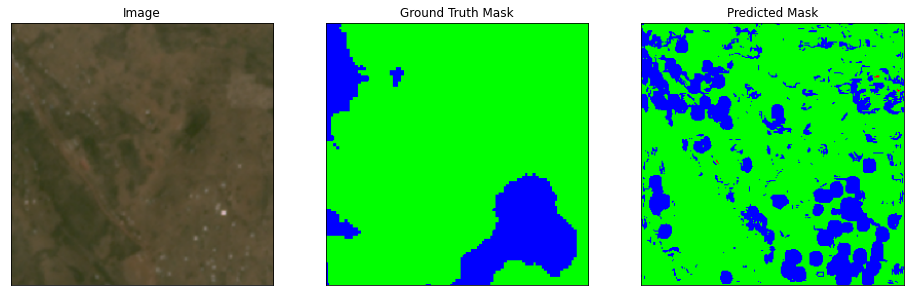

682


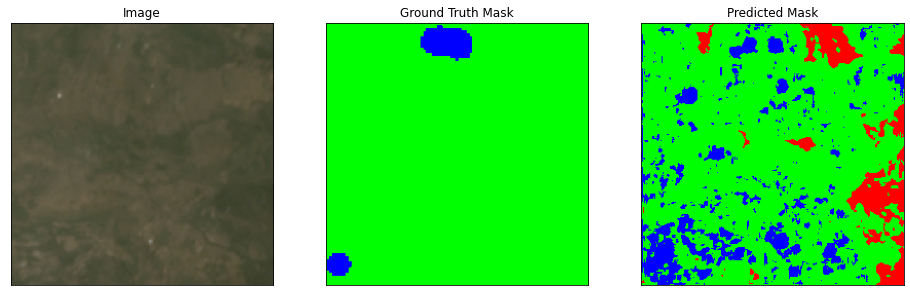

1057


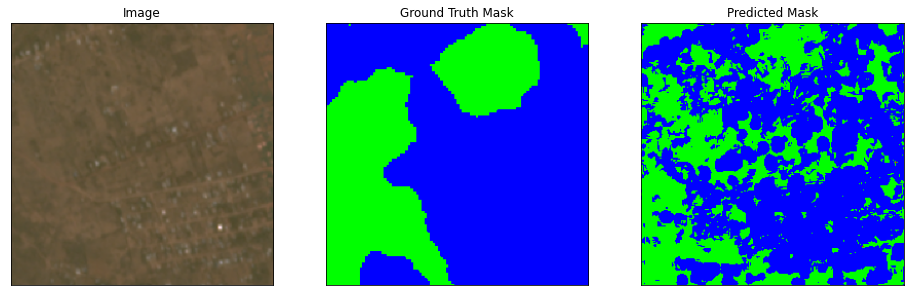

817


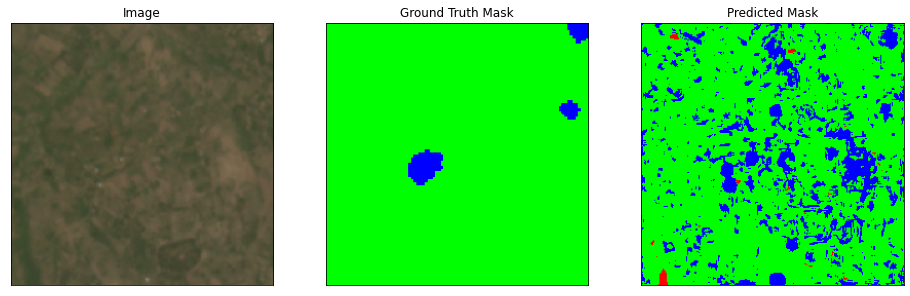

1398


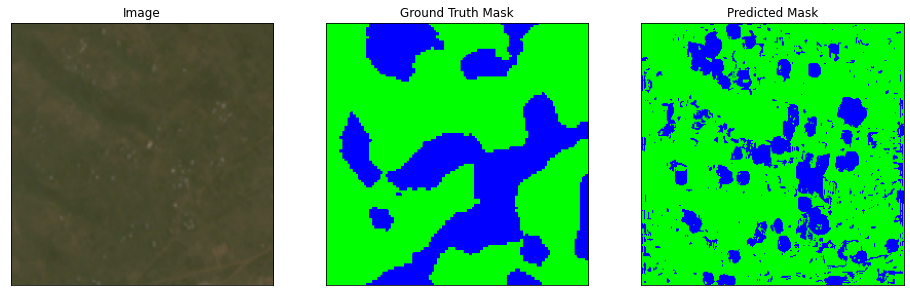

In [ ]:
test_dataset = ImageData(list_val_files)

for i in range(5):
    n = np.random.choice(len(test_dataset))
    print(n)
    image, gt_mask = test_dataset[n]
    
    image_vis = np.array(image)
    image_vis = np.transpose(image_vis,(1,2,0))

    gt_mask_vis = np.array(gt_mask)
    gt_mask_vis = np.transpose(gt_mask_vis,(1,2,0))


    x_tensor = image.to(DEVICE)
    pr_mask = best_model.forward(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
    #pr_mask = np.transpose(pr_mask, (1,2,0))
    pr_mask = np.argmax(pr_mask, axis = 0)
    pr_mask = to_categorical(pr_mask, num_classes = 3)
    #print(np.unique(pr_mask, return_counts = True))
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask_vis, 
        predicted_mask=pr_mask
    )

In [ ]:
import tensorflow as tf
test_dataset = ImageData(list_val_files)


precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []

precision_list_weighted = []
recall_list_weighted = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}

for i in range(len(test_dataset)):
    n = i
    print(n)
    image, gt_mask = test_dataset[n]

    x_tensor = image.to(DEVICE)
    pr_mask = best_model.forward(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
    pr_mask = np.argmax(pr_mask, axis = 0)
    
    
    gt_mask = np.argmax(gt_mask, axis = 0)

    uniq_gt = np.unique(gt_mask)
    uniq_pr = np.unique(pr_mask)  
    
    uniq_inter = np.union1d(uniq_gt, uniq_pr)
    uniq_inter = np.unique(uniq_inter)
  
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
    m.update_state(gt_mask,pr_mask)
    iou_overall.append(m.result().numpy())

    for k in uniq_inter:
      m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
      m.update_state(gt_mask,pr_mask)
      id_dict[k].append(m.result().numpy())

In [ ]:
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 68.89060735702515
Average IoU Land: 29.6677827835083
Average IoU Water: 22.2949281334877
Average IoU Overall: 49.98732805252075


In [ ]:
#IOU Calculation 2016
import tensorflow as tf
from tensorflow.python.ops.array_ops import broadcast_args

train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']

iou_score_land = []

iou_score_trees = []

iou_score_water = []

iou_overall = []

id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
#IOU Calculation 2019
for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 69.9495017528534
Average IoU Land: 31.376779079437256
Average IoU Water: 5.620623752474785
Average IoU Overall: 35.64896881580353


In [ ]:
#PRECISION AND RECALL CALCULATION 2016
from tensorflow.python.ops.array_ops import broadcast_args
from sklearn.metrics import classification_report
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']


precision_list_land = []
recall_list_land = []

precision_list_trees = []
recall_list_trees = []

precision_list_water = []
recall_list_water = []

accuracy_overall = []

for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])

In [ ]:
#PRECISION AND RECALL CALCULATION 2019
for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])

In [ ]:
from statistics import mean
print("Average Impervios Precision:", mean(precision_list_land)*100)
print("Average Impervios Recall:", mean(recall_list_land)*100)
print("Average Tree Canopy Precision:", mean(precision_list_trees)*100)
print("Average Tree Canopy Recall:", mean(recall_list_trees)*100)
print("Average Water Precision:", mean(precision_list_water)*100)
print("Average Water Recall:", mean(recall_list_water)*100)
print("Average Accuracy:", mean(accuracy_overall)*100)

Average Impervios Precision: 45.938770467874846
Average Impervios Recall: 57.62921611259877
Average Tree Canopy Precision: 86.2873489430584
Average Tree Canopy Recall: 79.79391303296836
Average Water Precision: 8.840992291070512
Average Water Recall: 9.779605869894896
Average Accuracy: 74.57923421672746


In [ ]:
iou_tree_loss = []
iou_tree_gain = []
iou_land_loss = []
iou_land_gain = []
iou_water_loss = []
iou_water_gain = []
iou_no_change = []
iou_overall_loss = []
iou_overall_gain = []

id_dict_loss = {0:iou_no_change, 1: iou_water_loss, 2: iou_tree_loss, 3: iou_land_loss}
id_dict_gain = {0:iou_no_change, 1: iou_water_gain, 2: iou_tree_gain, 3: iou_land_gain}


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256


  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  
  uniq_gt = np.unique(modified_image_2016_true)
  uniq_pr = np.unique(modified_image_2016_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))
  
  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2016_true,modified_image_2016_pred)
  iou_overall_loss.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2016_true,modified_image_2016_pred)
    id_dict_loss[k].append(m.result().numpy())


  uniq_gt = np.unique(modified_image_2019_true)
  uniq_pr = np.unique(modified_image_2019_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))
  
  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2019_true,modified_image_2019_pred)
  iou_overall_gain.append(m.result().numpy())
  
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2019_true,modified_image_2019_pred)
    id_dict_gain[k].append(m.result().numpy())

In [ ]:
from statistics import mean
print("Average IoU Land Loss:", mean(iou_land_loss)*100)
print("Average IoU Water Loss:", mean(iou_water_loss)*100)
print("Average IoU Tree Loss:", mean(iou_tree_loss)*100)
print("Average IoU Land Gain:", mean(iou_land_gain)*100)
print("Average IoU Water Gain:", mean(iou_water_gain)*100)
print("Average IoU Tree Gain:", mean(iou_tree_gain)*100)
print("Average IoU Overall Gain:", mean(iou_overall_gain)*100)
print("Average IoU Overall Loss:", mean(iou_overall_loss)*100)

Average IoU Land Loss: 0.9458967484533787
Average IoU Water Loss: 0.33758466597646475
Average IoU Tree Loss: 9.582425653934479
Average IoU Land Gain: 9.999270737171173
Average IoU Water Gain: 0.7206998765468597
Average IoU Tree Gain: 0.9260272607207298
Average IoU Overall Gain: 3.8819991052150726
Average IoU Overall Loss: 3.621968999505043


In [ ]:
precision_list_land_loss = []
recall_list_land_loss = []

precision_list_trees_loss = []
recall_list_trees_loss = []

precision_list_water_loss = []
recall_list_water_loss = []

accuracy_overall_loss = []

precision_list_land_gain = []
recall_list_land_gain = []

precision_list_trees_gain = []
recall_list_trees_gain = []

precision_list_water_gain = []
recall_list_water_gain = []

accuracy_overall_gain = []

id_dict_loss = {0:iou_no_change, 1: iou_water_loss, 2: iou_tree_loss, 3: iou_land_loss}
id_dict_gain = {0:iou_no_change, 1: iou_water_gain, 2: iou_tree_gain, 3: iou_land_gain}


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]

      x_tensor = image.to(DEVICE)
      pr_mask = best_model.forward(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().detach().numpy().round())
      pr_mask = np.argmax(pr_mask, axis = 0)
    
    
      gt_mask = np.argmax(gt_mask, axis = 0)

      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256


  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  
  modified_image_2016_true = np.reshape(modified_image_2016_true, (1024*1024))
  modified_image_2016_pred = np.reshape(modified_image_2016_pred, (1024*1024))

  report = classification_report(modified_image_2016_true, modified_image_2016_pred, output_dict=True)
  #print(report)
  try:
    precision_list_land_loss.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_loss.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_loss.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_loss.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_loss.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_loss.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_loss.append(report['accuracy'])


  modified_image_2019_true = np.reshape(modified_image_2019_true, (1024*1024))
  modified_image_2019_pred = np.reshape(modified_image_2019_pred, (1024*1024))

  report = classification_report(modified_image_2019_true, modified_image_2019_pred, output_dict=True)
  #print(report)
  try:
    precision_list_land_gain.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_gain.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_gain.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_gain.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_gain.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_gain.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_gain.append(report['accuracy'])


In [ ]:
from statistics import mean
print("Average Precision Land loss:", mean(precision_list_land_loss)*100)
print("Average Precision Water loss:", mean(precision_list_water_loss)*100)
print("Average Precision Trees loss:", mean(precision_list_trees_loss)*100)
print("Average Recall Land loss:", mean(recall_list_land_loss)*100)
print("Average Recall Water loss:", mean(recall_list_water_loss)*100)
print("Average Recall Trees loss:", mean(recall_list_trees_loss)*100)
print("Average Accuracy Overall loss:", mean(accuracy_overall_loss)*100)

Average Precision Land loss: 0.9967337538369425
Average Precision Water loss: 0.48656414373272466
Average Precision Trees loss: 21.562071896826556
Average Recall Land loss: 24.570220664080523
Average Recall Water loss: 5.867006960372832
Average Recall Trees loss: 15.97550860232686
Average Accuracy Overall loss: 66.03628981347177


In [ ]:
print("Average Precision Land gain:", mean(precision_list_land_gain)*100)
print("Average Precision Water gain:", mean(precision_list_water_gain)*100)
print("Average Precision Trees gain:", mean(precision_list_trees_gain)*100)
print("Average Recall Land gain:", mean(recall_list_land_gain)*100)
print("Average Recall Water gain:", mean(recall_list_water_gain)*100)
print("Average Recall Trees gain:", mean(recall_list_trees_gain)*100)
print("Average Accuracy Overall gain:", mean(accuracy_overall_gain)*100)

Average Precision Land gain: 23.905166462988152
Average Precision Water gain: 1.0197749550735793
Average Precision Trees gain: 0.9688024668488266
Average Recall Land gain: 15.863139104491413
Average Recall Water gain: 2.12468278774973
Average Recall Trees gain: 24.34704265764532
Average Accuracy Overall gain: 66.06512069702148
